<a href="https://colab.research.google.com/github/MRROOX/mii-analisis-de-datos/blob/master/Tarea3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea 3 - Evaluación de Modelos de Clasificación Módulo Análisis de Datos, EMI2016-1, 1° Semestre 2019

**Alumno: Felipe Quezada Gajardo**

**Instrucciones**

* (i) Separar los datos en un conjunto de Entrenamiento y otro de Testeo respetando la proporción existente entre 1 y 0 en la variable objetivo.
* (ii) Utilizar los datos de entrenamiento para estimar dos modelos predictivos (Adaline y Regresión Logistica).
* (iii) Estimar el error esperado fuera de la muestra para los dos predictores constuirdos utilizando los datos
de Testeo.
* (iv) Calcular otro estimador del error fuera de la muestra de ambos modelos utilizando Cross Validation
(con 5 subconjuntos)
* (v) Construir la matriz de confusión para ambos modelos. Además plotear la curva ROC y calcular el
AUC.
* (vi) En base a los resultados obtenidos señalar si alguno de los dos modelos es preferible, e indicar un
valor de corte para el predictor recomendable de acuerdo a la naturaleza del problema.

In [0]:
# Import de dependencias
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm

In [0]:
# Para subir el archivo a Collabs 
# Se debe cargar el archivo Datos_de_compra_retail.xlsx desde nuestro PC.
from google.colab import files
uploaded = files.upload()

Saving Datos_de_compra_retail.xlsx to Datos_de_compra_retail.xlsx


In [0]:
# Cargamos el archivo .xlsx a una Variable
import io
compras_retail = pd.ExcelFile(io.BytesIO(uploaded['Datos_de_compra_retail.xlsx']))

#print(compras_retail)

# Se lée la hoja Trainig Data del archivo excel
training_data = pd.read_excel(compras_retail, sheet_name=0)
#print(df_accounts)
training_data.head()

# Se elimina la columna vacia ya que no es necesaria
training_data = training_data.drop('Unnamed: 17', 1)

print(training_data.shape)

(1000, 18)


In [0]:
# Se categoriza de la columna PREGNANT
training_data['PREGNANT'] = training_data['PREGNANT'].astype('category')

training_data.head()

,Implied Gender,Home/Apt/ PO Box,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes,PREGNANT
0,M,A,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,M,H,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,M,H,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
3,U,H,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,F,A,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1


In [0]:
# Se realiza una separacion en categorias
d_gender = pd.get_dummies(training_data['Implied Gender'], prefix='Gender')
print(d_gender.head())

   Gender_F  Gender_M  Gender_U
0         0         1         0
1         0         1         0
2         0         1         0
3         0         0         1
4         1         0         0


In [0]:

# Se realiza la separacion en categorias 
d_resident = pd.get_dummies(training_data['Home/Apt/ PO Box'], prefix='Resident')
print(d_resident.head())

   Resident_A  Resident_H  Resident_P
0           1           0           0
1           0           1           0
2           0           1           0
3           0           1           0
4           1           0           0


In [0]:
# Se realiza la limpieza de los datos para aplicar modelos predictivos
cols_to_keep = training_data.columns[2:len(training_data.columns)-1] 

data = pd.concat([d_gender.ix[:, 'Gender_M':],d_resident.ix[:, 'Resident_H':],training_data[cols_to_keep]], axis=1)
data.insert(0, 'Intercept', 1.0) 
data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


,Intercept,Gender_M,Gender_U,Resident_H,Resident_P,Pregnancy Test,Birth Control,Feminine Hygiene,Folic Acid,Prenatal Vitamins,Prenatal Yoga,Body Pillow,Ginger Ale,Sea Bands,Stopped buying ciggies,Cigarettes,Smoking Cessation,Stopped buying wine,Wine,Maternity Clothes
0,1.0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1.0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,1.0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1.0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0
5,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
6,1.0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0
7,1.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
8,1.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9,1.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


In [0]:
# Se aplica la Regresion Logistica, con los datos de entrenamiento.

train_cols = data.columns[1:]
logit = sm.Logit(training_data['PREGNANT'], data[train_cols])

result = logit.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.373878
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               PREGNANT   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      981
Method:                           MLE   Df Model:                           18
Date:                Wed, 03 Jul 2019   Pseudo R-squ.:                  0.4606
Time:                        09:54:07   Log-Likelihood:                -373.88
converged:                       True   LL-Null:                       -693.15
Covariance Type:            nonrobust   LLR p-value:                6.050e-124
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Gender_M                  -0.6166      0.177     -3.481      0.000      -0.964      

In [0]:
# define X and y
X = data[train_cols]
y = training_data['PREGNANT']

# train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_class))

0.88


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


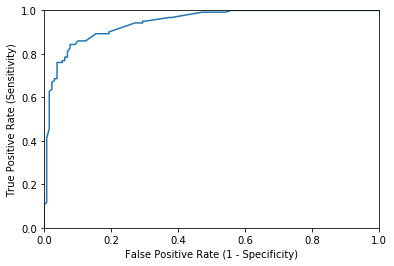

In [0]:
# predict probability of survival
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

import matplotlib.pyplot as plt

# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [0]:
# calculate AUC
print(metrics.roc_auc_score(y_test, y_pred_prob))

0.9439425972195529


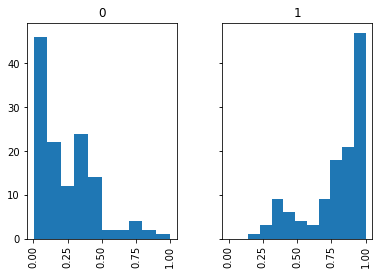

In [0]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)
plt.show()

In [0]:

# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=10, scoring='roc_auc').mean()

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

0.89872

In [0]:
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
clf.fit(data[train_cols], training_data['PREGNANT'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

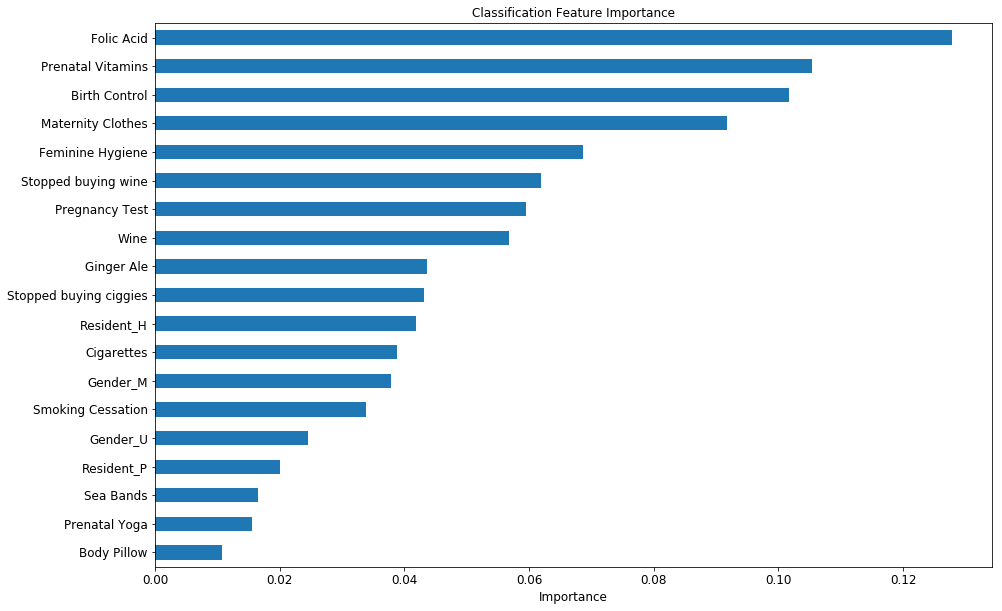

In [0]:
# sort the features by importance
sorted_idx = clf.feature_importances_
df_features = pd.DataFrame({"Feature": train_cols})
df_features['Importance'] = sorted_idx

df_features = df_features.sort_values(by=['Importance'], ascending=[True]) # sort my most important feature
ax = df_features.plot(kind='barh', title ="Classification Feature Importance", figsize=(15, 10), legend=False, fontsize=12)
ax.set_xlabel("Importance", fontsize=12)
ax.set_yticklabels(df_features['Feature'])
plt.show()